In [2]:
# 모듈 임포트

import pandas as pd
import numpy as np 
import datetime

# 종가데이터 종목별로 정리하기

    1. 시기 : 201401~201806

In [2]:
# read the data
df1 = pd.read_excel('stock01.xlsx')
df2 = pd.read_excel('stock02.xlsx')
df3 = pd.read_excel('stock03.xlsx')
df4 = pd.read_excel('stock04.xlsx')

In [3]:
# rename columns
df1=df1.rename(columns={'종목명':"name", '날짜':"date", '시가':"market_price", '고가':"high_price", '저가':"low_price", '종가':"end_price", '거래량':"trade_volume", '거래금액':"trade_price", '총주식수':"total_shares"})
df1['date']=df1['date'].astype("str")
df1['date']=df1['date'].astype("datetime64")

df2=df2.rename(columns={'종목명':"name", '날짜':"date", '시가':"market_price", '고가':"high_price", '저가':"low_price", '종가':"end_price", '거래량':"trade_volume", '거래금액':"trade_price", '총주식수':"total_shares"})
df2['date']=df2['date'].astype("str")
df2['date']=df2['date'].astype("datetime64")

df3=df3.rename(columns={'종목명':"name", '날짜':"date", '시가':"market_price", '고가':"high_price", '저가':"low_price", '종가':"end_price", '거래량':"trade_volume", '거래금액':"trade_price", '총주식수':"total_shares"})
df3['date']=df3['date'].astype("str")
df3['date']=df3['date'].astype("datetime64")

df4=df4.rename(columns={'종목명':"name", '날짜':"date", '시가':"market_price", '고가':"high_price", '저가':"low_price", '종가':"end_price", '거래량':"trade_volume", '거래금액':"trade_price", '총주식수':"total_shares"})
df4['date']=df4['date'].astype("str")
df4['date']=df4['date'].astype("datetime64")

In [6]:
# data 합치기
df=pd.concat([df1,df2,df3,df4])

In [7]:
# stockName  dataframe
StockName=df['name'].unique()
StockName

StockName= pd.DataFrame(data=StockName) 
StockName=StockName.rename(columns={0:'name'})
StockName['stock_number']=range(len(StockName))
StockName.to_csv("StockName.csv")

In [8]:
# stockName  dataframe
StockName=df['name'].unique()
StockName

StockName= pd.DataFrame(data=StockName) 
StockName=StockName.rename(columns={0:'name'})
StockName['stock_number']=range(len(StockName))
StockName.to_csv("StockName.csv")

In [9]:
# save
df.to_csv("df180707.csv")

# read 
df=pd.read_csv("df180707.csv")

In [10]:
df['date']=df['date'].astype('datetime64')

# 14년도 부터 데이터셋 추출
dataset14=df[df['date'].dt.year>=2014]

# 저장
dataset14.to_csv("180712data14years.csv")

In [12]:
df=pd.read_csv("180712data14years.csv")

In [13]:
# data 형 변환
df['date']=df['date'].astype('datetime64')

In [14]:
# 연도별로 데이터 저장
df14=df[df['date'].dt.year==2014]
df15=df[df['date'].dt.year==2015]
df16=df[df['date'].dt.year==2016]
df17=df[df['date'].dt.year==2017]
df18=df[df['date'].dt.year==2018]

In [15]:
# data 저장
df14.to_csv("df14_180712.csv")
df15.to_csv("df15_180712.csv")
df16.to_csv("df16_180712.csv")
df17.to_csv("df17_180712.csv")
df18.to_csv("df18_180712.csv")

In [18]:
stock_name=df14['name'].unique()
stock_name

array(['코웨이', '이월드', '강원랜드', ..., '동원산업', '농업회사법인 아시아종묘', '농업회사법인농우바이오'],
      dtype=object)

In [19]:
# 14년도 기업별 end price
Stock14=[]
for i in stock_name:
    temp=df14[df14['name']==i].groupby('date').agg({'end_price': np.mean}).rename(columns={'end_price': i})
    Stock14.append(temp)

In [20]:
timeSeries14=Stock14[0]

In [21]:
for i in range(stock_name.shape[0]-1):
    
    timeSeries14=timeSeries14.merge(Stock14[i+1], how='outer',left_on='date', right_on='date')

In [22]:
# drop na
timeSeries14=timeSeries14.dropna(1) # 1604의 기업

In [24]:
timeSeries14.shape

(245, 1604)

In [25]:
timeSeries14.to_csv("timeSeries14_name.csv")


In [26]:
# 15년도 기업별 end price
Stock15=[]
for i in stock_name:
    temp=df15[df15['name']==i].groupby('date').agg({'end_price': np.mean}).rename(columns={'end_price': i})
    Stock15.append(temp)
    
timeSeries15=Stock15[0]

for i in range(stock_name.shape[0]-1):
    
    timeSeries15=timeSeries15.merge(Stock15[i+1], how='outer',left_on='date', right_on='date')
    
    
# na값 제거
timeSeries15=timeSeries15.dropna(1)
timeSeries15.to_csv("timeSeries15_name.csv")

In [28]:
# 16년도 기업

Stock16=[]
for i in stock_name:
    temp=df16[df16['name']==i].groupby('date').agg({'end_price': np.mean}).rename(columns={'end_price': i})
    Stock16.append(temp)
    
timeSeries16=Stock16[0]

for i in range(stock_name.shape[0]-1):
    
    timeSeries16=timeSeries16.merge(Stock16[i+1], how='outer',left_on='date', right_on='date')

#na값 제거
timeSeries16=timeSeries16.dropna(1)
timeSeries16.to_csv("timeSeries16_name.csv")

In [29]:
#17년도 기업

Stock17=[]
for i in stock_name:
    temp=df17[df17['name']==i].groupby('date').agg({'end_price': np.mean}).rename(columns={'end_price': i})
    Stock17.append(temp)
    
timeSeries17=Stock17[0]

for i in range(stock_name.shape[0]-1):
    
    timeSeries17=timeSeries17.merge(Stock17[i+1], how='outer',left_on='date', right_on='date')

timeSeries17=timeSeries17.dropna(1)# 1777의 기업
print(timeSeries17.shape)
timeSeries17.to_csv("timeSeries17_name.csv")

(240, 1676)


In [30]:
# 18년도 기업

Stock18=[]
for i in stock_name:
    temp=df18[df18['name']==i].groupby('date').agg({'end_price': np.mean}).rename(columns={'end_price': i})
    Stock18.append(temp)
    
timeSeries18=Stock18[0]

for i in range(stock_name.shape[0]-1):
    
    timeSeries18=timeSeries18.merge(Stock18[i+1], how='outer',left_on='date', right_on='date')

imeSeries18=timeSeries18.dropna(1)# 1777의 기업
print(timeSeries18.shape)
timeSeries18.to_csv("timeSeries18_name.csv")

(121, 1676)


(121, 1676)

# 종목별 return 구하기

In [35]:
# timeSeries14~18까지 데이터 로드

df14=pd.read_csv("timeSeries14_name.csv")
df15=pd.read_csv("timeSeries15_name.csv")
df16=pd.read_csv("timeSeries16_name.csv")
df17=pd.read_csv("timeSeries17_name.csv")
df18=pd.read_csv("timeSeries18_name.csv")

In [36]:
# data 형 변환
df14['month']=df14['date'].astype("str").astype('datetime64').dt.month
df14['year']=df14['date'].astype("str").astype('datetime64').dt.year


df15['month']=df15['date'].astype("str").astype('datetime64').dt.month
df15['year']=df15['date'].astype("str").astype('datetime64').dt.year

df16['month']=df16['date'].astype("str").astype('datetime64').dt.month
df16['year']=df16['date'].astype("str").astype('datetime64').dt.year


df17['month']=df17['date'].astype("str").astype('datetime64').dt.month
df17['year']=df17['date'].astype("str").astype('datetime64').dt.year


df18['month']=df18['date'].astype("str").astype('datetime64').dt.month
df18['year']=df18['date'].astype("str").astype('datetime64').dt.year



In [37]:
# 연도마다 na값이 차이가 남
# 제일 적은 데이터 기준으로 합치기


col_name=df14.columns

df15=df15[col_name]
df16=df16[col_name]
df17=df17[col_name]
df18=df18[col_name]

# 합치기
df=pd.concat([df14,df15,df16,df17,df18])

In [38]:
# stock name 추출
stock_name=df.columns[1:-2]

In [39]:
rate=df[stock_name].pct_change()

In [46]:
rate.columns

Index(['코웨이', '이월드', '강원랜드', '그랜드코리아레저', '파라다이스', '아난티', '갤럭시아에스엠', '판타지오',
       '와이비엠넷', '멀티캠퍼스',
       ...
       '마니커', '동우팜투테이블', '하림', '동원', '에스아이리소스', '동원수산', '신라교역', '사조산업', '동원산업',
       '농업회사법인농우바이오'],
      dtype='object', length=1604)

In [40]:
# 하루 return rate가  10이상인 기업 : 14년부터 18년 6월까지 액면분할을 진행한 기업 찾기

outlier=[]
for i in rate.columns:
    for j in range(rate.shape[0]):
        if np.abs(rate[i].iloc[j])>5: # 하루에 5배이상 오른 종목만 집중
            print(i)
            outlier.append(i)

성창기업지주
아모레G
롯데지주
크라운해태홀딩스
미원홀딩스 
넥센
DB Inc.
케이엔엔
티비씨
아이오케이컴퍼니
(주)스포츠서울
KCTC 
남성
일성건설
두산건설
삼일기업공사
동원개발
대우조선해양
덕양산업
화승알앤에이
태양금속공업
동양물산기업
제이스테판
케이디 네이쳐 엔 바이오
제일테크노스
한국특수형강
서산
포스코켐텍
백광소재
행남사
셀루메드
아모레퍼시픽 
성보화학
애경유화
극동유화
국일제지
영풍제지
컨버즈
신풍제지
대양제지공업
에스마크
경방
엠에스씨


In [47]:
# outlier 제거하기
tmp=list(df.columns[1:])
for i in outlier:
    tmp.remove(i)
print(len(tmp)) # 1564 개 43개의 종목 제거
print(tmp)


1563
['코웨이', '이월드', '강원랜드', '그랜드코리아레저', '파라다이스', '아난티', '갤럭시아에스엠', '판타지오', '와이비엠넷', '멀티캠퍼스', '정상제이엘에스', '디지털대성', '청담러닝', '웅진씽크빅 ', '대교', '한국코퍼레이션', '효성아이티엑스 ', '한국전자금융', '에스씨아이평가정보', '메디플란트', '한국기업평가', '고려신용정보', '나이스디앤비', '에스원', '참좋은여행', '세중', '레드캡투어', '하나투어', '롯데관광개발 ', '모두투어네트워크', '에코바이오홀딩스', '마크로젠', '코아시아홀딩스', '테스나', '아이텍반도체', '오로라월드', '시공테크', '오르비텍', '한국종합기술', '유신', '한국전력기술 ', '포스코아이씨티', '에이치엘비생명과학', '한양이엔지', '한미글로벌건축사사무소', '삼성엔지니어링', '성도이엔지', '희림종합건축사사무소', '도화엔지니어링', '한전산업개발', '아이디스홀딩스', '지투알', '유수홀딩스', '아세아', '솔본', '녹십자홀딩스', '제일파마홀딩스', 'NICE', '동성코퍼레이션', '두산', '대성홀딩스', '나스미디어', '제일기획', '이엠넷', '서울리거', '오리콤', '아이진', '디엔에이링크', '진매트릭스', '크리스탈지노믹스', '바이오톡스텍', '레고켐바이오사이언스', '내츄럴엔도텍', '바이로메드', '제넥신', '랩지노믹스', '메지온', '신라섬유', '해성산업', '이스타코', '키움증권', '케이티비투자증권', '엔에이치투자증권', '유진투자증권', '신영증권', '메리츠종합금융증권', '이베스트투자증권', 'SK증권', '유안타증권', '한양증권', '부국증권', '유화증권', '삼성증권', '미래에셋대우', 'DB금융투자', '대신증권', '현대차투자증권', '한화투자증권', '교보증권', '골든브릿지투자증권', '코리안리재보험', '삼성생명보험', '삼성화재해상보험', '롯데손해보험', '한화생명보험', '동양생

In [48]:
stock_name=tmp

In [56]:
# 코웨이 한달 평균종가 구하기 예시
result=df[['year','month','코웨이']].groupby(['year','month']).mean()

result


코웨이
year month               
2014 1       64955.000000
     2       68000.000000
     3       72833.333333
     4       77727.272727
     5       83873.684211
     6       83373.684211
     7       90408.695652
     8       89500.000000
     9       84715.789474
     10      84333.333333
     11      84230.000000
     12      85371.428571
2015 1       83619.047619
     2       87670.588235
     3       88236.363636
     4       96104.545455
     5       91450.000000
     6       88127.272727
     7       95400.000000
     8       92150.000000
     9       82470.000000
     10      87976.190476
     11      88538.095238
     12      85676.190476
2016 1       92325.000000
     2       97172.222222
     3       95681.818182
     4       95750.000000
     5      100260.000000
     6      105928.571429
     7       93452.380952
     8       86659.090909
     9       92221.052632
     10      93725.000000
     11      89600.000000
     12      88952.380952
2017 1       88755.000000
     2       88060.000000
     3       90377.272727
     4       99685.000000
     5      102568.421053
     6      103611.111111
     7      101009.523810
     8       98586.363636
     9       96595.238095
     10      96906.250000
     11     100277.272727
     12     103805.263158
2018 1       97036.363636
     2       89372.222222
     3       87433.333333
     4       88752.380952
     5       89290.000000
     6       90463.157895

In [57]:
# 모든 stock 한달 평균 종가 구하기
for name in stock_name[:-1]:
    print(name)
    tmp=df[['year','month',name]].groupby(['year','month']).mean()
    result=result.merge(tmp, how='inner', left_on=['year','month'], right_on=['year','month'])

코웨이
이월드
강원랜드
그랜드코리아레저
파라다이스
아난티
갤럭시아에스엠
판타지오
와이비엠넷
멀티캠퍼스
정상제이엘에스
디지털대성
청담러닝
웅진씽크빅 
대교
한국코퍼레이션
효성아이티엑스 
한국전자금융
에스씨아이평가정보
메디플란트
한국기업평가
고려신용정보
나이스디앤비
에스원
참좋은여행
세중
레드캡투어
하나투어
롯데관광개발 
모두투어네트워크
에코바이오홀딩스
마크로젠
코아시아홀딩스
테스나
아이텍반도체
오로라월드
시공테크
오르비텍
한국종합기술
유신
한국전력기술 
포스코아이씨티
에이치엘비생명과학
한양이엔지
한미글로벌건축사사무소
삼성엔지니어링
성도이엔지
희림종합건축사사무소
도화엔지니어링
한전산업개발
아이디스홀딩스
지투알
유수홀딩스
아세아
솔본
녹십자홀딩스
제일파마홀딩스
NICE
동성코퍼레이션
두산
대성홀딩스
나스미디어
제일기획
이엠넷
서울리거
오리콤
아이진
디엔에이링크
진매트릭스
크리스탈지노믹스
바이오톡스텍
레고켐바이오사이언스
내츄럴엔도텍
바이로메드
제넥신
랩지노믹스
메지온
신라섬유
해성산업
이스타코
키움증권
케이티비투자증권
엔에이치투자증권
유진투자증권
신영증권
메리츠종합금융증권
이베스트투자증권
SK증권
유안타증권
한양증권
부국증권
유화증권
삼성증권
미래에셋대우
DB금융투자
대신증권
현대차투자증권
한화투자증권
교보증권
골든브릿지투자증권
코리안리재보험
삼성생명보험
삼성화재해상보험
롯데손해보험
한화생명보험
동양생명보험
한화손해보험
DB손해보험
흥국화재해상보험
메리츠화재해상보험
현대해상화재보험
인터파크홀딩스
웅진
매일홀딩스
한국전자홀딩스
에스케이디스커버리
경동인베스트
유비쿼스홀딩스
세아홀딩스
우리산업홀딩스
서연
평화홀딩스
JW홀딩스 
SJM홀딩스
한솔홀딩스
하이트진로홀딩스
신송홀딩스
제이콘텐트리
풀무원
슈프리마에이치큐
하나금융지주
JB금융지주
대상홀딩스 
큐캐피탈파트너스
게임빌
KISCO홀딩스
골프존뉴딘홀딩스
휴온스글로벌
심텍홀딩스
샘표
케이씨그린홀딩스
한국투자금융지주
비츠로테크
한국콜마홀딩스
BNK금융지주
덕산하이메탈
LS
동아쏘시오홀딩스
이녹스
GS
영원무역홀딩스
원익홀딩스


효성오앤비
조비
동방아그로
경농
남해화학
엔피케이
네패스신소재
코오롱플라스틱
에이치알에스
코프라
OCI
램테크놀러지
롯데케미칼
카프로
유니드 
백광산업
KPX케미칼
에스케이 머티리얼즈
경인양행
동진쎄미켐
금호석유화학
원익머트리얼즈
대한유화
진양폴리우레탄
금양
이수화학
태경화학
SH에너지화학
후성 
주식회사동남합성
롯데정밀화학
대정화금
씨큐브
LG화학
한일화학공업
국도화학
태경산업
바이오빌
동성화학
KG케미칼
엘티씨
한화케미칼
동성화인텍
한솔케미칼
리켐
S-Oil
퍼시픽바이오
한국쉘석유
미창석유공업
제이엠아이
카카오엠
에스엠라이프디자인그룹
양지사
모나리자
대림제지
한국팩키지
태림포장
아세아제지
한국수출포장공업
삼륭물산
대영포장
신대양제지
무림페이퍼
깨끗한나라
한국제지
세하
크린앤사이언스
한창제지
무림에스피
삼정펄프 
삼보판지
페이퍼코리아
무림피앤피
선창산업
동화기업
이건산업
한솔홈데코
유니켐
조광피혁
삼양통상
코웰패션
신원
데코앤이
형지아이앤씨
TBH글로벌
한세실업
BYC
원풍물산
쌍방울
태평양물산
좋은사람들
대현
남영비비안
지엔코
코데즈컴바인
메타랩스
F&F
인디에프
신영와코루
LF
형지엘리트
한섬
에스티오
케이엠
지에이치신소재
아즈텍더블유비이
일정실업
원림
성안
대한방직
웰크론
방림
동일방직
일신방직
전방
케이티앤지
롯데칠성음료
네이처셀
진로발효
풍국주정공업
무학
보해양조
MH에탄올
하이트진로
국순당
이지바이오
대주산업
한일사료
팜스토리
진바이오텍
케이씨피드
선진
CJ씨푸드
농심
씨제이제일제당 주식회사 
아미코젠
SPC삼립
대상
조흥
오뚜기
사조해표
동원F&B
삼양식품
서울식품공업
삼양사
사조동아원
우성사료
한탑
대한제당
팜스코
고려산업
대한제분
남양유업
롯데푸드
빙그레
푸드웰
사조대림
사조씨푸드
사조오양
한성기업
마니커
동우팜투테이블
하림
동원
에스아이리소스
동원수산
신라교역
사조산업
동원산업
농업회사법인농우바이오
month


ValueError: Grouper for 'month' not 1-dimensional

In [59]:
result

코웨이_x          코웨이_y          이월드          강원랜드  \
year month                                                            
2014 1       64955.000000   64955.000000   808.550000  33132.500000   
     2       68000.000000   68000.000000  1001.450000  32337.500000   
     3       72833.333333   72833.333333   862.714286  31195.238095   
     4       77727.272727   77727.272727   884.318182  30495.454545   
     5       83873.684211   83873.684211   817.631579  29684.210526   
     6       83373.684211   83373.684211  1308.684211  29213.157895   
     7       90408.695652   90408.695652  1863.478261  32506.521739   
     8       89500.000000   89500.000000  2919.750000  34757.500000   
     9       84715.789474   84715.789474  2245.000000  35207.894737   
     10      84333.333333   84333.333333  2521.666667  34435.714286   
     11      84230.000000   84230.000000  1988.750000  33952.500000   
     12      85371.428571   85371.428571  1706.904762  31738.095238   
2015 1       83619.047619   83619.047619  1761.190476  31447.619048   
     2       87670.588235   87670.588235  1852.941176  33332.352941   
     3       88236.363636   88236.363636  1878.636364  33793.181818   
     4       96104.545455   96104.545455  2273.636364  36738.636364   
     5       91450.000000   91450.000000  2251.666667  38936.111111   
     6       88127.272727   88127.272727  2138.181818  38088.636364   
     7       95400.000000   95400.000000  1970.217391  39904.347826   
     8       92150.000000   92150.000000  1698.750000  42545.000000   
     9       82470.000000   82470.000000  2144.750000  41890.000000   
     10      87976.190476   87976.190476  2950.000000  42845.238095   
     11      88538.095238   88538.095238  3072.380952  40169.047619   
     12      85676.190476   85676.190476  2751.428571  39471.428571   
2016 1       92325.000000   92325.000000  2630.750000  38590.000000   
     2       97172.222222   97172.222222  2883.333333  41227.777778   
     3       95681.818182   95681.818182  2890.909091  41536.363636   
     4       95750.000000   95750.000000  2647.500000  42005.000000   
     5      100260.000000  100260.000000  2457.250000  42345.000000   
     6      105928.571429  105928.571429  2806.190476  42345.238095   
     7       93452.380952   93452.380952  2923.809524  41159.523810   
     8       86659.090909   86659.090909  3009.772727  40606.818182   
     9       92221.052632   92221.052632  2467.368421  39631.578947   
     10      93725.000000   93725.000000  2155.250000  38540.000000   
     11      89600.000000   89600.000000  1864.090909  36552.272727   
     12      88952.380952   88952.380952  1897.142857  36864.285714   
2017 1       88755.000000   88755.000000  2285.750000  34635.000000   
     2       88060.000000   88060.000000  2275.000000  34955.000000   
     3       90377.272727   90377.272727  2149.090909  35579.545455   
     4       99685.000000   99685.000000  2030.750000  37040.000000   
     5      102568.421053  102568.421053  2062.631579  37000.000000   
     6      103611.111111  103611.111111  1967.777778  35388.888889   
     7      101009.523810  101009.523810  1825.476190  34964.285714   
     8       98586.363636   98586.363636  1766.818182  35693.181818   
     9       96595.238095   96595.238095  1838.333333  35000.000000   
     10      96906.250000   96906.250000  1779.375000  34171.875000   
     11     100277.272727  100277.272727  1887.272727  36468.181818   
     12     103805.263158  103805.263158  1800.263158  36318.421053   
2018 1       97036.363636   97036.363636  1790.681818  32125.000000   
     2       89372.222222   89372.222222  1774.166667  30408.333333   
     3       87433.333333   87433.333333  1824.047619  28200.000000   
     4       88752.380952   88752.380952  2075.714286  28040.476190   
     5       89290.000000   89290.000000  2010.250000  28002.500000   
     6       90463.157895   90463.157895  1824.210526  27655.263158   

                그랜드코리아레저         파라다이스     

In [60]:
result=result.drop(columns=['코웨이_y'])
result=result.rename(columns={'코웨이_x':'코웨이'})

In [61]:
# data 확인
result

코웨이          이월드          강원랜드      그랜드코리아레저  \
year month                                                           
2014 1       64955.000000   808.550000  33132.500000  39537.500000   
     2       68000.000000  1001.450000  32337.500000  41502.500000   
     3       72833.333333   862.714286  31195.238095  44752.380952   
     4       77727.272727   884.318182  30495.454545  44295.454545   
     5       83873.684211   817.631579  29684.210526  42478.947368   
     6       83373.684211  1308.684211  29213.157895  40107.894737   
     7       90408.695652  1863.478261  32506.521739  42106.521739   
     8       89500.000000  2919.750000  34757.500000  44432.500000   
     9       84715.789474  2245.000000  35207.894737  43194.736842   
     10      84333.333333  2521.666667  34435.714286  38876.190476   
     11      84230.000000  1988.750000  33952.500000  38787.500000   
     12      85371.428571  1706.904762  31738.095238  34533.333333   
2015 1       83619.047619  1761.190476  31447.619048  37588.095238   
     2       87670.588235  1852.941176  33332.352941  37400.000000   
     3       88236.363636  1878.636364  33793.181818  34634.090909   
     4       96104.545455  2273.636364  36738.636364  39211.363636   
     5       91450.000000  2251.666667  38936.111111  41066.666667   
     6       88127.272727  2138.181818  38088.636364  36154.545455   
     7       95400.000000  1970.217391  39904.347826  30321.739130   
     8       92150.000000  1698.750000  42545.000000  30317.500000   
     9       82470.000000  2144.750000  41890.000000  31895.000000   
     10      87976.190476  2950.000000  42845.238095  33066.666667   
     11      88538.095238  3072.380952  40169.047619  27111.904762   
     12      85676.190476  2751.428571  39471.428571  24769.047619   
2016 1       92325.000000  2630.750000  38590.000000  21932.500000   
     2       97172.222222  2883.333333  41227.777778  23961.111111   
     3       95681.818182  2890.909091  41536.363636  24115.909091   
     4       95750.000000  2647.500000  42005.000000  26487.500000   
     5      100260.000000  2457.250000  42345.000000  28952.500000   
     6      105928.571429  2806.190476  42345.238095  26742.857143   
     7       93452.380952  2923.809524  41159.523810  25711.904762   
     8       86659.090909  3009.772727  40606.818182  26150.000000   
     9       92221.052632  2467.368421  39631.578947  25155.263158   
     10      93725.000000  2155.250000  38540.000000  23137.500000   
     11      89600.000000  1864.090909  36552.272727  21613.636364   
     12      88952.380952  1897.142857  36864.285714  21116.666667   
2017 1       88755.000000  2285.750000  34635.000000  19662.500000   
     2       88060.000000  2275.000000  34955.000000  20345.000000   
     3       90377.272727  2149.090909  35579.545455  20195.454545   
     4       99685.000000  2030.750000  37040.000000  21932.500000   
     5      102568.421053  2062.631579  37000.000000  22634.210526   
     6      103611.111111  1967.777778  35388.888889  22386.111111   
     7      101009.523810  1825.476190  34964.285714  22290.476190   
     8       98586.363636  1766.818182  35693.181818  23438.636364   
     9       96595.238095  1838.333333  35000.000000  22500.000000   
     10      96906.250000  1779.375000  34171.875000  25612.500000   
     11     100277.272727  1887.272727  36468.181818  31347.727273   
     12     103805.263158  1800.263158  36318.421053  30550.000000   
2018 1       97036.363636  1790.681818  32125.000000  29584.090909   
     2       89372.222222  1774.166667  30408.333333  25916.666667   
     3       87433.333333  1824.047619  28200.000000  24000.000000   
     4       88752.380952  2075.714286  28040.476190  26138.095238   
     5       89290.000000  2010.250000  28002.500000  27305.000000   
     6       90463.157895  1824.210526  27655.263158  26994.736842   

                   파라다이스           아난티      갤럭시아에스엠         판타지오        와이비엠넷  \
year month          

In [62]:
# save
result.to_csv("avg_price_month_delOutlier.csv")

In [63]:
# return rate 구하기
Return_14_18=result.pct_change()

In [64]:
# NaN 값은 1로 채우기 -> 나중에 제거할 예정
Return_14_18.iloc[0]=1

In [65]:
Return_14_18.to_csv("return1418_delOutlier.csv")

In [70]:
Return_14_18.dropna()

코웨이       이월드      강원랜드  그랜드코리아레저     파라다이스       아난티  \
year month                                                               
2014 1      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
     2      0.046879  0.238575 -0.023995  0.049700  0.042612  0.265807   
     3      0.071078 -0.138535 -0.035323  0.078306  0.147000 -0.087907   
     4      0.067194  0.025042 -0.022432 -0.010210  0.102259 -0.043492   
     5      0.079077 -0.075410 -0.026602 -0.041009  0.037337 -0.067508   
     6     -0.005961  0.600579 -0.015869 -0.055817  0.017176 -0.013465   
     7      0.084379  0.423933  0.112736  0.049831 -0.038938  0.088772   
     8     -0.010051  0.566828  0.069247  0.055240  0.007165  0.163583   
     9     -0.053455 -0.231099  0.012958 -0.027857 -0.020008  0.276319   
     10    -0.004515  0.123237 -0.021932 -0.099979 -0.082565  0.114439   
     11    -0.001225 -0.211335 -0.014032 -0.002281 -0.131308 -0.065716   
     12     0.013551 -0.141720 -0.065221 -0.109679 -0.126218 -0.073986   
2015 1     -0.020527  0.031804 -0.009152  0.088458 -0.017630  0.089488   
     2      0.048452  0.052096  0.059932 -0.005004 -0.069000  0.319767   
     3      0.006453  0.013867  0.013825 -0.073955 -0.058402  0.271298   
     4      0.089172  0.210259  0.087161  0.132161  0.160328  0.297820   
     5     -0.048432 -0.009663  0.059814  0.047315  0.121846  0.093883   
     6     -0.036334 -0.050400 -0.021766 -0.119613 -0.003444 -0.002747   
     7      0.082525 -0.078555  0.047671 -0.161330 -0.146823  0.324734   
     8     -0.034067 -0.137786  0.066175 -0.000140 -0.082130  0.001488   
     9     -0.105046  0.262546 -0.015395  0.052033  0.001593 -0.153529   
     10     0.066766  0.375452  0.022803  0.036735 -0.006945  0.117827   
     11     0.006387  0.041485 -0.062462 -0.180084 -0.033878  0.181944   
     12    -0.032324 -0.104464 -0.017367 -0.086414 -0.132822  0.002174   
2016 1      0.077604 -0.043860 -0.022331 -0.114520 -0.170485 -0.146039   
     2      0.052502  0.096012  0.068354  0.092493 -0.037927 -0.204612   
     3     -0.015338  0.002627  0.007485  0.006460  0.044305  0.118091   
     4      0.000713 -0.084198  0.011283  0.098341  0.052331  0.035158   
     5      0.047102 -0.071860  0.008094  0.093063  0.037360  0.166295   
     6      0.056539  0.142004  0.000006 -0.076320 -0.059481 -0.029537   
     7     -0.117779  0.041914 -0.028001 -0.038551 -0.003951 -0.014380   
     8     -0.072693  0.029401 -0.013428  0.017039  0.042209  0.001716   
     9      0.064182 -0.180214 -0.024017 -0.038040 -0.002111 -0.030387   
     10     0.016308 -0.126499 -0.027543 -0.080212 -0.099287  0.044911   
     11    -0.044012 -0.135093 -0.051576 -0.065861 -0.094018 -0.052546   
     12    -0.007228  0.017731  0.008536 -0.022993 -0.056640 -0.030754   
2017 1     -0.002219  0.204838 -0.060473 -0.068863  0.065006 -0.089147   
     2     -0.007831 -0.004703  0.009239  0.034711  0.063686  0.015065   
     3      0.026315 -0.055345  0.017867 -0.007350 -0.053338 -0.007076   
     4      0.102987 -0.055066  0.041048  0.086012  0.075000 -0.040439   
     5      0.028925  0.015699 -0.001080  0.031994  0.101043  0.122317   
     6      0.010166 -0.045987 -0.043544 -0.010961 -0.042697 -0.018338   
     7     -0.025109 -0.072316 -0.011998 -0.004272 -0.111808 -0.054071   
     8     -0.023989 -0.032133  0.020847  0.051509  0.079762 -0.063996   
     9     -0.020197  0.040477 -0.019421 -0.040047 -0.045256 -0.170760   
     10     0.003220 -0.032072 -0.023661  0.138333  0.272489 -0.026626   
     11     0.034786  0.060638  0.067199  0.223923  0.370526  0.175964   
     12     0.035182 -0.046103 -0.004107 -0.025448 -0.056036 -0.032382   
2018 1     -0.065208 -0.005322 -0.115463 -0.031617  0.018747 -0.022348   
     2     -0.078982 -0.009223 -0.053437 -0.123966 -0.071688  0.010525   
     3     -0.021695  0.028115 -0.072623 -0.073955 -0.070695  0.161887   
     4      0.015086  0.137972 -0.005657  0.089087  0.127604  0.178287   
     5      0.006058 

# 업종별 평균 return rate구하기

In [102]:
# returnsector는 return1418에 종목이름 업종코드 업종을 붙인 데이터셋
df=pd.read_csv("returnSector.csv") # 업종과 관계된 데이터 업종데이터에 없는 종목은 제거한다
df.to_csv("returnSector.csv",encoding='utf-8-sig')

In [103]:
delName=[]
for name in df['기업명']:
    if name in outlier:
        print(name)
        delName.append(name) # 34개


성창기업지주
롯데지주
크라운해태홀딩스
넥센
티비씨
남성
일성건설
두산건설
삼일기업공사
동원개발
대우조선해양
덕양산업
화승알앤에이
태양금속공업
동양물산기업
제이스테판
케이디 네이쳐 엔 바이오
제일테크노스
한국특수형강
서산
포스코켐텍
백광소재
행남사
셀루메드
성보화학
애경유화
극동유화
국일제지
영풍제지
컨버즈
신풍제지
에스마크
경방
엠에스씨


In [104]:
tmp=list(df['기업명'])

for i in delName:
    if i in tmp:
        tmp.remove(i)
    

In [105]:
len(tmp)-len((df['기업명']))

-34

In [106]:
# 제거할 인덱스 추출
indexdel=[]
for i in delName:
   
    print(df[df['기업명']==i].index[0])
    indexdel.append(df[df['기업명']==i].index[0])
    
print(df.drop(indexdel))

40
107
120
135
210
346
413
423
429
435
485
503
519
552
565
799
810
945
968
1016
1023
1025
1029
1141
1190
1225
1231
1239
1241
1242
1256
1296
1297
1317
      Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0              0             0               0                 0   
1              1             1               1                 1   
2              2             2               2                 2   
3              3             3               3                 3   
4              4             4               4                 4   
5              5             5               5                 5   
6              6             6               6                 6   
7              7             7               7                 7   
8              8             8               8                 8   
9              9             9               9                 9   
10            10            10              10                10   
11            11            11    

In [107]:
# 제거하기
df=df.drop(indexdel)

In [108]:
len(df['업종'].unique()) # 140개의 업종

140

In [109]:
# return rate 업종 평균
sector=df.groupby('업종').mean()

In [110]:
sector.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,0,1,2,3,...,46,47,48,49,50,51,52,53,종목코드,업종코드
업종,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,957.500000,957.500000,957.500000,957.500000,957.500000,957.500000,1.0,0.028713,0.024819,0.031803,...,0.019302,-0.046950,0.001286,0.011328,0.021268,0.056317,0.164631,-0.054930,41594.285714,32402.0
1차 철강 제조업,986.428571,986.428571,986.428571,986.428571,986.428571,986.428571,1.0,0.026186,0.059964,0.054170,...,0.016473,-0.008369,0.034009,0.017763,0.013942,0.030332,0.130816,-0.044676,23248.333333,32401.0
가구 제조업,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,1.0,0.077142,0.042357,0.022888,...,0.031610,0.107559,0.128599,0.018067,0.032287,0.057099,-0.001625,-0.074759,55864.285714,33201.0
가전제품 및 정보통신장비 소매업,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,1.0,-0.047901,-0.033341,-0.031774,...,-0.030776,0.005298,0.008156,-0.027151,0.010496,0.046392,0.045096,-0.009614,71840.000000,74703.0
가정용 기기 제조업,658.500000,658.500000,658.500000,658.500000,658.500000,658.500000,1.0,0.029276,0.142470,0.098092,...,0.111255,0.050601,0.093888,0.004664,0.076648,0.019159,-0.045850,-0.088291,44075.000000,32805.0


In [111]:
# 2014년 1월 데이터 nan 값 제거(1로 처리하였음)
# 필요없는 columns 제거
sector=sector.drop(columns=['종목코드','0','업종코드','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1','Unnamed: 0.1.1.1.1.1'])


In [113]:
# sector return rate
sector.to_csv("Sector_return_outlier.csv",encoding='utf-8-sig')

In [88]:
sector=sector.drop(columns=['Unnamed: 0.1.1'])

In [115]:
sector_corr=sector.T.corr()

In [117]:
sector_corr

업종,1차 비철금속 제조업,1차 철강 제조업,가구 제조업,가전제품 및 정보통신장비 소매업,가정용 기기 제조업,"가죽, 가방 및 유사제품 제조업",건물 건설업,건물설비 설치 공사업,"건축기술, 엔지니어링 및 관련 기술 서비스업","건축자재, 철물 및 난방장치 도매업",...,"펄프, 종이 및 판지 제조업",편조원단 제조업,폐기물 처리업,플라스틱제품 제조업,합성고무 및 플라스틱 물질 제조업,항공 여객 운송업,"항공기,우주선 및 부품 제조업",해상 운송업,화학섬유 제조업,회사 본부 및 경영 컨설팅 서비스업
업종,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,1.000000,0.746936,0.266202,0.023821,0.335010,0.202686,0.589388,0.353929,0.522077,0.387935,...,0.548933,0.523327,0.419980,0.559953,0.275556,0.158313,0.185098,0.205348,0.203966,0.365020
1차 철강 제조업,0.746936,1.000000,0.346076,0.224341,0.497009,0.140039,0.757551,0.457986,0.649840,0.330536,...,0.579304,0.676816,0.477213,0.623145,0.362335,0.397247,0.341412,0.330155,0.330819,0.398734
가구 제조업,0.266202,0.346076,1.000000,0.000643,0.627915,0.244714,0.492022,0.191776,0.391250,0.096136,...,0.412101,0.494286,0.370111,0.485446,0.340579,0.152065,0.174383,0.105557,0.277072,0.489209
가전제품 및 정보통신장비 소매업,0.023821,0.224341,0.000643,1.000000,0.084734,0.087163,0.156321,0.262344,0.272438,0.042203,...,0.170717,0.179570,0.046762,0.042335,0.102260,0.236471,0.057343,0.207166,0.311186,0.091090
가정용 기기 제조업,0.335010,0.497009,0.627915,0.084734,1.000000,0.100548,0.499962,0.203478,0.488516,0.165108,...,0.525285,0.553004,0.458013,0.548873,0.453923,0.239661,0.314441,-0.024786,0.393923,0.537590
"가죽, 가방 및 유사제품 제조업",0.202686,0.140039,0.244714,0.087163,0.100548,1.000000,0.317714,0.144499,0.061996,0.083921,...,0.227624,0.154978,0.301185,0.094611,-0.003604,0.168054,0.088205,0.204139,0.136148,0.271730
건물 건설업,0.589388,0.757551,0.492022,0.156321,0.499962,0.317714,1.000000,0.304165,0.664856,0.417203,...,0.600566,0.608302,0.602099,0.470334,0.196375,0.448709,0.365456,0.294984,0.286978,0.483425
건물설비 설치 공사업,0.353929,0.457986,0.191776,0.262344,0.203478,0.144499,0.304165,1.000000,0.292968,-0.022962,...,0.196573,0.481425,0.284807,0.381073,0.428689,0.344973,0.169200,0.321932,0.314997,0.154470
"건축기술, 엔지니어링 및 관련 기술 서비스업",0.522077,0.649840,0.391250,0.272438,0.488516,0.061996,0.664856,0.292968,1.000000,0.564136,...,0.522699,0.481842,0.395959,0.519088,0.310575,0.166573,0.213480,0.217436,0.346772,0.490531


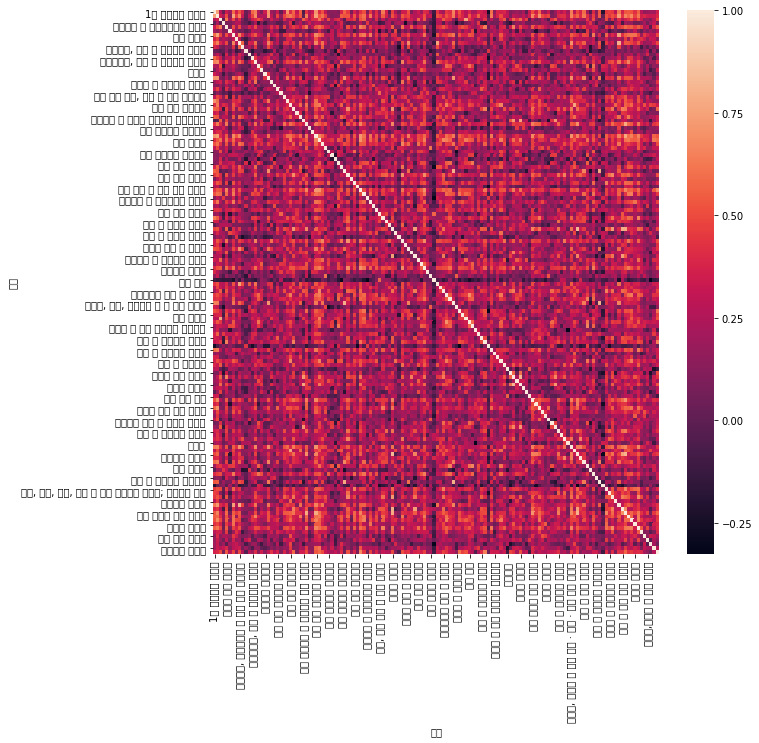

In [118]:
# heatmap 살펴보기
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(sector_corr)

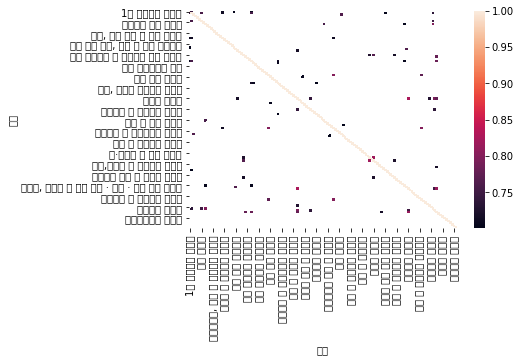

In [119]:
# 상관관계가 0.7이상인 업종
sns.heatmap(sector_corr[sector_corr>0.7].loc[sector_corr[sector_corr>0.7].columns])

# 업종간 상관관계 구하기

In [120]:
from scipy.stats import pearsonr
dataset=sector.T
index=dataset.columns # 업종이름
index

Index(['1차 비철금속 제조업', '1차 철강 제조업', '가구 제조업', '가전제품 및 정보통신장비 소매업', '가정용 기기 제조업',
       '가죽, 가방 및 유사제품 제조업', '건물 건설업', '건물설비 설치 공사업',
       '건축기술, 엔지니어링 및 관련 기술 서비스업', '건축자재, 철물 및 난방장치 도매업',
       ...
       '펄프, 종이 및 판지 제조업', '편조원단 제조업', '폐기물 처리업', '플라스틱제품 제조업',
       '합성고무 및 플라스틱 물질 제조업', '항공 여객 운송업', '항공기,우주선 및 부품 제조업', '해상 운송업',
       '화학섬유 제조업', '회사 본부 및 경영 컨설팅 서비스업'],
      dtype='object', name='업종', length=140)

In [121]:
table=[]

In [122]:
# 0.7이상의 상관관계를 가지는 업종짝 구하기
for i in range(len(index)):
    for j in range(len(index)):
        if (pearsonr(dataset[index[i]],dataset[index[j]])[0]>0.7)&(pearsonr(dataset[index[i]],dataset[index[j]])[1]<0.05)&(pearsonr(dataset[index[i]],dataset[index[j]])[0]!=1):
            # 상관계수가 0.75이고 p_value가 0.05보다 작은 것 고르기
            table.append((index[i],index[j],pearsonr(dataset[index[i]],dataset[index[j]])[0],pearsonr(dataset[index[i]],dataset[index[j]])[1]))
            print(index[i],index[j],pearsonr(dataset[index[i]],dataset[index[j]])[0])

1차 비철금속 제조업 1차 철강 제조업 0.7469356275054787
1차 비철금속 제조업 구조용 금속제품, 탱크 및 증기발생기 제조업 0.7098616365890139
1차 비철금속 제조업 금속 주조업 0.7041929249936247
1차 비철금속 제조업 기타 금속 가공제품 제조업 0.7080345353037512
1차 철강 제조업 1차 비철금속 제조업 0.7469356275054787
1차 철강 제조업 건물 건설업 0.7575505256615428
1차 철강 제조업 구조용 금속제품, 탱크 및 증기발생기 제조업 0.7128739641581193
1차 철강 제조업 기타 금속 가공제품 제조업 0.7554840040501299
1차 철강 제조업 자동차 신품 부품 제조업 0.7013870625967275
1차 철강 제조업 토목 건설업 0.7346706747667228
가구 제조업 알코올음료 제조업 0.7631996861127496
건물 건설업 1차 철강 제조업 0.7575505256615428
건물 건설업 토목 건설업 0.7499677555986605
건축기술, 엔지니어링 및 관련 기술 서비스업 선박 및 보트 건조업 0.7554940092414594
건축기술, 엔지니어링 및 관련 기술 서비스업 전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업 0.7044718851008491
건축기술, 엔지니어링 및 관련 기술 서비스업 토목 건설업 0.7981719314683863
구조용 금속제품, 탱크 및 증기발생기 제조업 1차 비철금속 제조업 0.7098616365890139
구조용 금속제품, 탱크 및 증기발생기 제조업 1차 철강 제조업 0.7128739641581193
구조용 금속제품, 탱크 및 증기발생기 제조업 시멘트, 석회, 플라스터 및 그 제품 제조업 0.7122619711218198
금속 주조업 1차 비철금속 제조업 0.7041929249936247
금융 지원 서비스업 전문디자인업 0.7645246413381901
기계장비 및 관련 물품 도매업 반도체 

In [123]:
table=pd.DataFrame(table)

In [124]:
table.columns=['sector1','sector2','corr','p_value']

In [126]:
len(table['sector1'].unique()) # 38개 업종

38

In [127]:
table.to_csv("corrTable7_outlier.csv",encoding='utf-8-sig')  # 2018-08-01 여기까지 함 밥먹고 다시하기

# 업종안에 속하는 종목과 업종간의 상관관계 구하기

In [128]:
# stock 
stock=pd.read_csv("returnSector.csv")

In [129]:
# index를 기업명으로 바꾸기
stock.index=stock['기업명']

In [131]:
# 업종별로 추출하기
stock=stock.drop(columns=['Unnamed: 0','0','업종코드','기업명','종목코드'])

In [132]:
stock=stock.drop(columns=['name'])

In [136]:
stock=stock[stock.columns[3:]] # unnamed 열 제거하기 

In [138]:
# 0.7이상의 상관관계를 가지는 모든 업종의 각 종목 상관관계 구하기
index=table['sector1'].unique() # index는 sector부분
table=[]

In [139]:
for i in range(len(index)):
    stock_name=stock[stock['업종']==index[i]].index
    for j in range(len(stock_name)):
        if (pearsonr(dataset[index[i]],stock.loc[stock_name[j]].T.iloc[:-1])[1]<0.05)&(pearsonr(dataset[index[i]],stock.loc[stock_name[j]].T.iloc[:-1])[0]!=1):
            # 상관계수가 0.75이고 p_value가 0.05보다 작은 것 고르기
            table.append((index[i],stock_name[j],pearsonr(dataset[index[i]],stock.loc[stock_name[j]].T.iloc[:-1])[0],pearsonr(dataset[index[i]],stock.loc[stock_name[j]].T.iloc[:-1])[1]))
            
            print(index[i],stock_name[j],pearsonr(dataset[index[i]],stock.loc[stock_name[j]].T.iloc[:-1])[0])

1차 비철금속 제조업 대창 0.6586591499891146
1차 비철금속 제조업 영풍 0.3313394659602592
1차 비철금속 제조업 피제이메탈 0.49035172682228473
1차 비철금속 제조업 이구산업 0.6459316257192379
1차 비철금속 제조업 대호에이엘 0.523471904365774
1차 비철금속 제조업 조일알미늄 0.4067210389580166
1차 비철금속 제조업 삼아알미늄 0.5395146845036153
1차 비철금속 제조업 갑을메탈 0.6100532293582864
1차 비철금속 제조업 남선알미늄 0.680541764774522
1차 비철금속 제조업 한창산업 0.42854942969877985
1차 비철금속 제조업 황금에스티 0.36960376296184716
1차 철강 제조업 대양금속 0.44091122625833973
1차 철강 제조업 성광벤드 0.6467700700382105
1차 철강 제조업 쎄니트 0.6488719487239224
1차 철강 제조업 고려제강 0.45731177020860064
1차 철강 제조업 경남스틸 0.5730535182452186
1차 철강 제조업 동일산업 0.485633515363813
1차 철강 제조업 동국산업 0.3849749536582016
1차 철강 제조업 금강공업 0.5934815800821404
1차 철강 제조업 삼현철강 0.6941550105477308
1차 철강 제조업 한국선재 0.4942533845905114
1차 철강 제조업 TCC동양 0.4967843664783797
1차 철강 제조업 세아제강 0.5503405513854774
1차 철강 제조업 삼강엠앤티 0.4028981939307685
1차 철강 제조업 한국철강 0.4968826311325906
1차 철강 제조업 포스코 0.3803115894926439
1차 철강 제조업 신화실업 0.315628514722999
1차 철강 제조업 태광 0.4992328959275462
1차 철강 제조업 만호제강 0.77539740

기타 전문 도매업 하이텍팜 0.3783617840044878
기타 전문 도매업 아미노로직스 0.35714737651258727
기타 전문 도매업 원익큐브 0.5387231790360762
기타 전문 도매업 엔케이물산 0.5306962642302994
기타 화학제품 제조업 한화 0.49222841131922646
기타 화학제품 제조업 네오팜 0.6617568808415074
기타 화학제품 제조업 SKC 0.38749286918268827
기타 화학제품 제조업 에이블씨엔씨 0.3490936971846667
기타 화학제품 제조업 한국화장품제조 0.6401104347568903
기타 화학제품 제조업 리더스코스메틱 0.6568076400295152
기타 화학제품 제조업 케이피엠테크 0.4349602994312328
기타 화학제품 제조업 SK바이오랜드 0.5193513332677036
기타 화학제품 제조업 보락 0.39639430043293306
기타 화학제품 제조업 코스온 0.683156159253217
기타 화학제품 제조업 한국콜마 0.5156138355455813
기타 화학제품 제조업 조광페인트 0.3246126730037755
기타 화학제품 제조업 현대아이비티 0.2891620804046644
기타 화학제품 제조업 솔브레인 0.3798601136937225
기타 화학제품 제조업 보령메디앙스 0.5973336453500716
기타 화학제품 제조업 미원화학 0.39767944008701134
기타 화학제품 제조업 한농화성 0.3540093567097102
기타 화학제품 제조업 디엔에프 0.3293139663111708
기타 화학제품 제조업 라이온켐텍 0.34540224675762515
기타 화학제품 제조업 삼화페인트공업 0.39696082653580694
기타 화학제품 제조업 나노신소재 0.39547389331612987
기타 화학제품 제조업 제닉 0.6218999762790788
기타 화학제품 제조업 강남제비스코 0.3666163984811963
기타 화학제품 제조

전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업 지엔씨에너지 0.45473249568525537
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업 서호전기 0.5241309744081952
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업 에스피지 0.45524387524924037
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업 비츠로시스 0.6772201217256429
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업 로체시스템즈 0.4131434229027868
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업 제룡전기 0.5497846759088441
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업 LS산전 0.4854007765280599
전문디자인업 시공테크 0.9999999999999999
전자부품 제조업 피에스엠씨 0.35051032961437983
전자부품 제조업 유아이엘 0.44639202106891057
전자부품 제조업 에스티큐브 0.3509021790630702
전자부품 제조업 뉴프렉스 0.47688887390184925
전자부품 제조업 LG디스플레이 0.3907406750205912
전자부품 제조업 아이엠 0.6122091011164114
전자부품 제조업 코리아써키트 0.5285882576504123
전자부품 제조업 엘컴텍 0.3877091732237517
전자부품 제조업 케이디 네이쳐 엔 바이오 0.32123117119956973
전자부품 제조업 월덱스 0.5352910099405833
전자부품 제조업 삼화전기 0.3879965552709677
전자부품 제조업 성우테크론 0.37040928261541095
전자부품 제조업 동일기연 0.3898571928547265
전자부품 제조업 디에이피 0.5212234526806176
전자부품 제조업 대덕GDS 0.5948701354093923
전자부품 제조업 아비코전자 0.5186753100807898
전자부품 제조

In [140]:
stock_sector=pd.DataFrame(table)
stock_sector.columns=['sector','stock','corr','p_value']
stock_sector.to_csv("해당업종전체종목상관관계_이상치.csv",encoding='utf-8-sig')

In [141]:
# 해당업종 전체종목 상관관계
stock_sector

,sector,stock,corr,p_value
0,1차 비철금속 제조업,대창,0.658659,8.267003e-08
1,1차 비철금속 제조업,영풍,0.331339,1.536908e-02
2,1차 비철금속 제조업,피제이메탈,0.490352,1.935740e-04
3,1차 비철금속 제조업,이구산업,0.645932,1.758991e-07
4,1차 비철금속 제조업,대호에이엘,0.523472,5.768992e-05
5,1차 비철금속 제조업,조일알미늄,0.406721,2.509468e-03
6,1차 비철금속 제조업,삼아알미늄,0.539515,3.063302e-05
7,1차 비철금속 제조업,갑을메탈,0.610053,1.238287e-06
8,1차 비철금속 제조업,남선알미늄,0.680542,2.068438e-08
9,1차 비철금속 제조업,한창산업,0.428549,1.367170e-03


# Networkx 그래프

In [200]:
stock_sector[stock_sector['corr']>=0.7].to_csv("stock_sector_corr_outlier.csv")

In [1]:
# 모듈 임포트
import pandas as pd 
import numpy as np
import collections

import networkx as nx
import seaborn as sb
import matplotlib.pylab as plt
from pylab import rcParams

from scipy.stats import pearsonr

In [2]:
sector=pd.read_csv("corrTable7_outlier.csv")
stock_sec=pd.read_csv("stock_sector_corr_outlier.csv")

In [3]:
sector=sector.drop(columns=['Unnamed: 0'])
stock_sec=stock_sec.drop(columns=['Unnamed: 0'])

In [4]:
sector['sector1'].unique() # 생활용품 도매업 처리하기

array(['1차 비철금속 제조업', '1차 철강 제조업', '가구 제조업', '건물 건설업',
       '건축기술, 엔지니어링 및 관련 기술 서비스업', '구조용 금속제품, 탱크 및 증기발생기 제조업', '금속 주조업',
       '금융 지원 서비스업', '기계장비 및 관련 물품 도매업', '기초 의약물질 및 생물학적 제제 제조업',
       '기초 화학물질 제조업', '기타 금속 가공제품 제조업', '기타 금융업', '기타 전기장비 제조업',
       '기타 전문 도매업', '기타 화학제품 제조업', '반도체 제조업', '봉제의복 제조업',
       '사진장비 및 광학기기 제조업', '생활용품 도매업', '선박 및 보트 건조업', '수산물 가공 및 저장 처리업',
       '시멘트, 석회, 플라스터 및 그 제품 제조업', '알코올음료 제조업', '어로 어업',
       '의료용품 및 기타 의약 관련제품 제조업', '의약품 제조업', '일반 목적용 기계 제조업',
       '자동차 신품 부품 제조업', '자연과학 및 공학 연구개발업',
       '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업', '전문디자인업', '전자부품 제조업',
       '철도장비 제조업', '컴퓨터 프로그래밍, 시스템 통합 및 관리업', '토목 건설업', '통신 및 방송 장비 제조업',
       '특수 목적용 기계 제조업'], dtype=object)

In [5]:
# 업종 및 기업 수 알아보기
len(sector['corr'].unique())
len(stock_sec['stock'].unique()) # 52개의 기업을 연결시킨다

61

In [6]:
sector.columns=['sector1','sector2','corr','p-value']

In [7]:
sec_net=nx.Graph()

In [8]:
# 한글 폰트가져오기

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False


In [9]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  2.2.2
설치 위치:  c:\users\ryu07\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\ryu07\.matplotlib
캐시 위치:  C:\Users\ryu07\.matplotlib


In [10]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

In [11]:
# ttf 폰트 전체갯수
print(len(font_list)) 

657


In [12]:
font_list_mac = fm.win32InstalledFonts()
print(len(font_list_mac))

335


In [13]:
font_list[:10] 
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트명 만 출력
f[:10]

657


['DejaVu Serif',
 'DejaVu Sans',
 'cmex10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Serif Display',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'cmmi10',
 'DejaVu Sans Mono']

In [14]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [15]:
font_name

'Malgun Gothic'

c:\users\ryu07\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


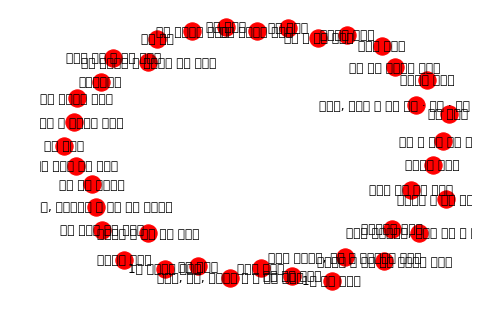

[('1차 비철금속 제조업', 0), ('1차 철강 제조업', 0), ('가구 제조업', 0), ('건물 건설업', 0), ('건축기술, 엔지니어링 및 관련 기술 서비스업', 0), ('구조용 금속제품, 탱크 및 증기발생기 제조업', 0), ('금속 주조업', 0), ('금융 지원 서비스업', 0), ('기계장비 및 관련 물품 도매업', 0), ('기초 의약물질 및 생물학적 제제 제조업', 0), ('기초 화학물질 제조업', 0), ('기타 금속 가공제품 제조업', 0), ('기타 금융업', 0), ('기타 전기장비 제조업', 0), ('기타 전문 도매업', 0), ('기타 화학제품 제조업', 0), ('반도체 제조업', 0), ('봉제의복 제조업', 0), ('사진장비 및 광학기기 제조업', 0), ('생활용품 도매업', 0), ('선박 및 보트 건조업', 0), ('수산물 가공 및 저장 처리업', 0), ('시멘트, 석회, 플라스터 및 그 제품 제조업', 0), ('알코올음료 제조업', 0), ('어로 어업', 0), ('의료용품 및 기타 의약 관련제품 제조업', 0), ('의약품 제조업', 0), ('일반 목적용 기계 제조업', 0), ('자동차 신품 부품 제조업', 0), ('자연과학 및 공학 연구개발업', 0), ('전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업', 0), ('전문디자인업', 0), ('전자부품 제조업', 0), ('철도장비 제조업', 0), ('컴퓨터 프로그래밍, 시스템 통합 및 관리업', 0), ('토목 건설업', 0), ('통신 및 방송 장비 제조업', 0), ('특수 목적용 기계 제조업', 0)]


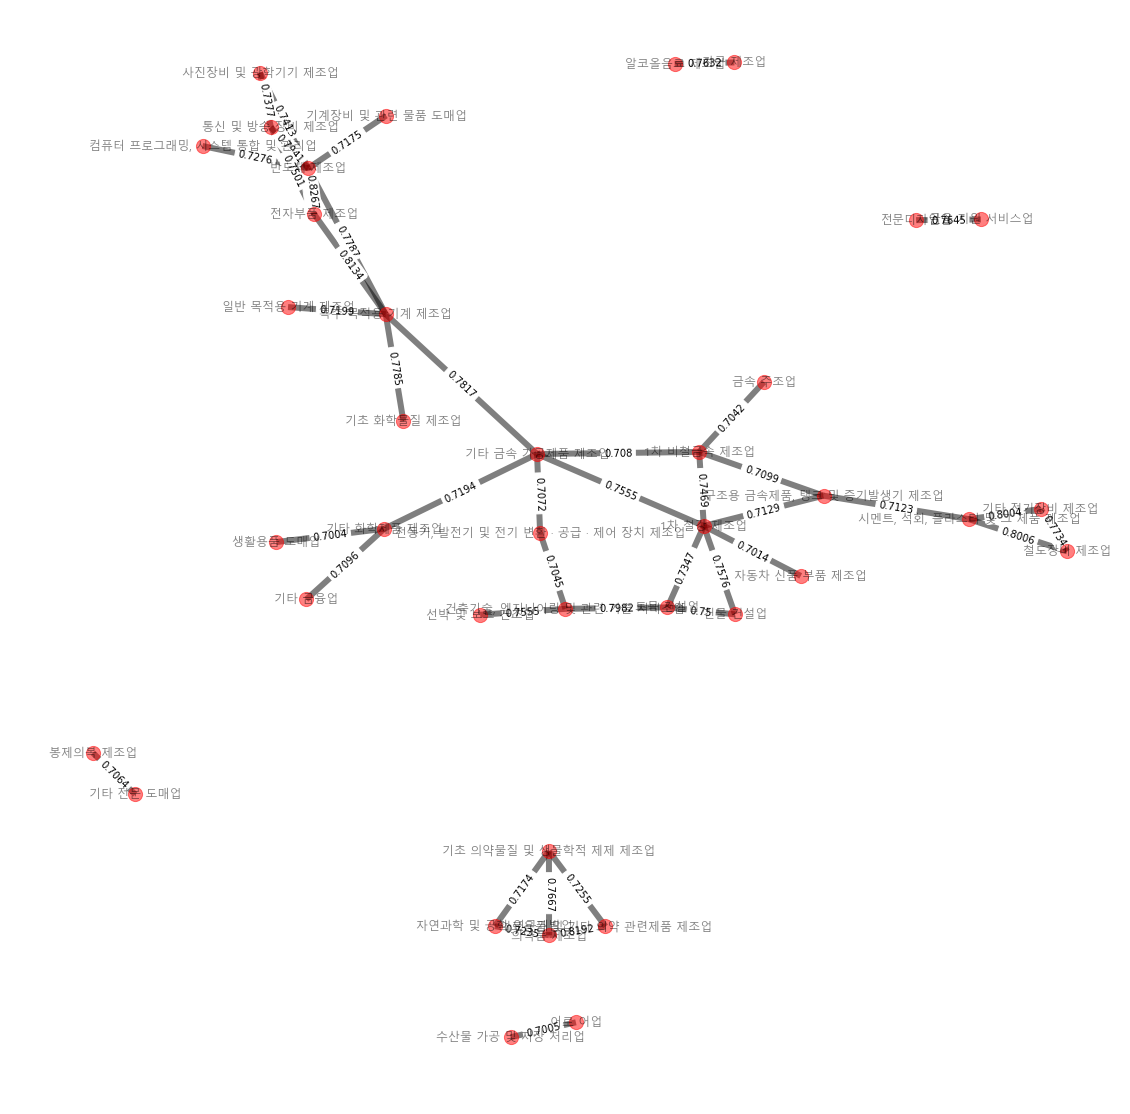

In [16]:
# 업종간 네트워크 
# lable 새로 쓰기
plt.rc('font', family='AppleGothic')
for i in sector['sector1']:
    sec_net.add_node(i)
    
nx.draw(sec_net,with_labels = True, font_family='AppleGothic')
plt.show()


len(sec_net.node) # 36 중복없음
print(sec_net.degree) # 몇 개 연결되어있는지


for (i,j,corr) in np.array(sector[['sector1','sector2','corr']]):
    sec_net.add_edge(i,j,weight=1/corr*0.1,label=round(corr,4))# 길이 어떻게 늘리는지
        # weight가 적을수록 멀어짐
    
plt.figure(figsize=(15,15))

edge_labels =dict([((u, v), d['label']) 
                   for u, v, d in sec_net.edges(data=True)])
pos = nx.spring_layout(sec_net) 
#nx.draw_networkx_edges(sec_net,pos,edgelist=edge_labels)
#nx.draw_networkx_edge_labels(sec_net, pos, edge_labels= edge_labels)
nx.draw(sec_net,pos,with_labels = True, node_size=200,width=6,alpha=0.5,font_family=font_name)
nx.draw_networkx_edge_labels(sec_net,pos, edge_labels= edge_labels)

plt.show()

In [302]:
sec_net=nx.Graph()

c:\users\ryu07\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


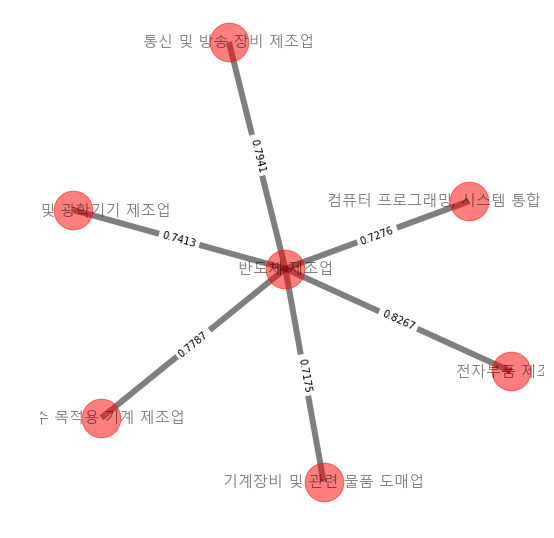

In [321]:
# 해당 업종만 그래프그리기 : 반도체 제조업
for (i,j,corr) in np.array(sector[['sector1','sector2','corr']]):
    if i=='반도체 제조업':
        sec_net.add_edge(i,j,weight=corr*0.01,label=round(corr,4))# 길이 어떻게 늘리는지
        # weight가 적을수록 멀어짐
    
plt.figure(figsize=(7,7))

edge_labels =dict([((u, v), d['label']) 
                   for u, v, d in sec_net.edges(data=True)])
pos = nx.spring_layout(sec_net) 
#nx.draw_networkx_edges(sec_net,pos,edgelist=edge_labels)
#nx.draw_networkx_edge_labels(sec_net, pos, edge_labels= edge_labels)
nx.draw(sec_net,pos,with_labels = True, node_size=1500,width=6,alpha=0.5,font_family=font_name,font_size=15)
nx.draw_networkx_edge_labels(sec_net,pos, edge_labels= edge_labels)

plt.show()

In [331]:
sec_net=nx.Graph()

c:\users\ryu07\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


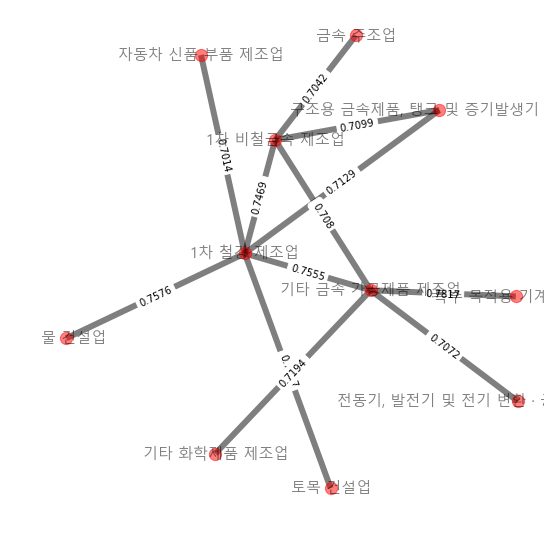

In [337]:
# 해당 업종만 그래프그리기 : 철강 제조업
for (i,j,corr) in np.array(sector[['sector1','sector2','corr']]):
    if (i=="1차 비철금속 제조업") or(i=="1차 철강 제조업") or(i=="기타 금속 가공제품 제조업"):
        sec_net.add_edge(i,j,weight=corr*0.01,label=round(corr,4))# 길이 어떻게 늘리는지
        # weight가 적을수록 멀어짐
    
plt.figure(figsize=(7,7))

edge_labels =dict([((u, v), d['label']) 
                   for u, v, d in sec_net.edges(data=True)])
pos = nx.spring_layout(sec_net) 
#nx.draw_networkx_edges(sec_net,pos,edgelist=edge_labels)
#nx.draw_networkx_edge_labels(sec_net, pos, edge_labels= edge_labels)
nx.draw(sec_net,pos,with_labels = True, node_size=150,width=6,alpha=0.5,font_family=font_name,font_size=15)
nx.draw_networkx_edge_labels(sec_net,pos, edge_labels= edge_labels)

plt.show()

c:\users\ryu07\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


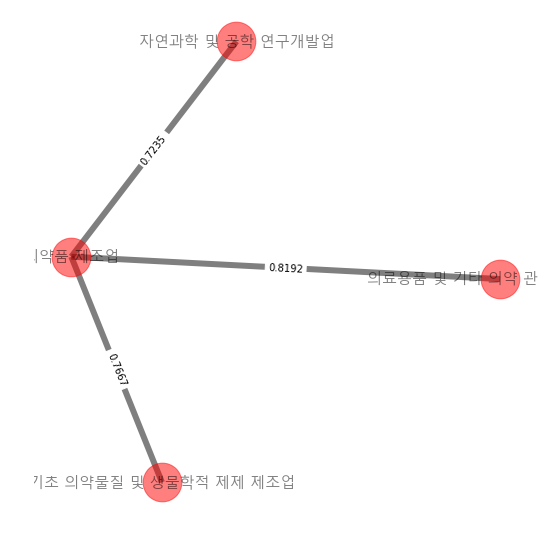

In [344]:
sec_net=nx.Graph()
# 해당 업종만 그래프그리기 : 의약품 제조업
for (i,j,corr) in np.array(sector[['sector1','sector2','corr']]):
    if (i=="의약품 제조업"):
        sec_net.add_edge(i,j,weight=corr*0.01,label=round(corr,4))# 길이 어떻게 늘리는지
        # weight가 적을수록 멀어짐
    
plt.figure(figsize=(7,7))

edge_labels =dict([((u, v), d['label']) 
                   for u, v, d in sec_net.edges(data=True)])
pos = nx.spring_layout(sec_net) 
#nx.draw_networkx_edges(sec_net,pos,edgelist=edge_labels)
#nx.draw_networkx_edge_labels(sec_net, pos, edge_labels= edge_labels)
nx.draw(sec_net,pos,with_labels = True, node_size=1500,width=6,alpha=0.5,font_family=font_name,font_size=15)
nx.draw_networkx_edge_labels(sec_net,pos, edge_labels= edge_labels)

plt.show()

In [346]:
sector['sector1'].unique()

array(['1차 비철금속 제조업', '1차 철강 제조업', '가구 제조업', '건물 건설업',
       '건축기술, 엔지니어링 및 관련 기술 서비스업', '구조용 금속제품, 탱크 및 증기발생기 제조업', '금속 주조업',
       '금융 지원 서비스업', '기계장비 및 관련 물품 도매업', '기초 의약물질 및 생물학적 제제 제조업',
       '기초 화학물질 제조업', '기타 금속 가공제품 제조업', '기타 금융업', '기타 전기장비 제조업',
       '기타 전문 도매업', '기타 화학제품 제조업', '반도체 제조업', '봉제의복 제조업',
       '사진장비 및 광학기기 제조업', '생활용품 도매업', '선박 및 보트 건조업', '수산물 가공 및 저장 처리업',
       '시멘트, 석회, 플라스터 및 그 제품 제조업', '알코올음료 제조업', '어로 어업',
       '의료용품 및 기타 의약 관련제품 제조업', '의약품 제조업', '일반 목적용 기계 제조업',
       '자동차 신품 부품 제조업', '자연과학 및 공학 연구개발업',
       '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업', '전문디자인업', '전자부품 제조업',
       '철도장비 제조업', '컴퓨터 프로그래밍, 시스템 통합 및 관리업', '토목 건설업', '통신 및 방송 장비 제조업',
       '특수 목적용 기계 제조업'], dtype=object)

c:\users\ryu07\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


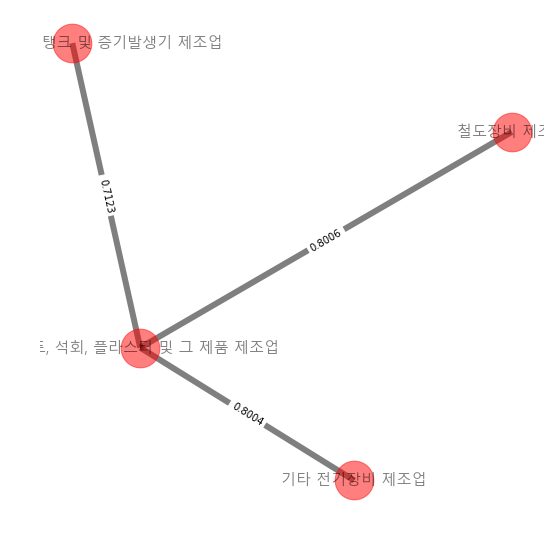

In [348]:
sec_net=nx.Graph()
# 해당 업종만 그래프그리기 :시멘트, 석회, 플라스터 및 그 제품 제조업
for (i,j,corr) in np.array(sector[['sector1','sector2','corr']]):
    if (i=="시멘트, 석회, 플라스터 및 그 제품 제조업"):
        sec_net.add_edge(i,j,weight=corr*0.01,label=round(corr,4))# 길이 어떻게 늘리는지
        # weight가 적을수록 멀어짐
    
plt.figure(figsize=(7,7))

edge_labels =dict([((u, v), d['label']) 
                   for u, v, d in sec_net.edges(data=True)])
pos = nx.spring_layout(sec_net) 
#nx.draw_networkx_edges(sec_net,pos,edgelist=edge_labels)
#nx.draw_networkx_edge_labels(sec_net, pos, edge_labels= edge_labels)
nx.draw(sec_net,pos,with_labels = True, node_size=1500,width=6,alpha=0.5,font_family=font_name,font_size=15)
nx.draw_networkx_edge_labels(sec_net,pos, edge_labels= edge_labels)

plt.show()

c:\users\ryu07\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


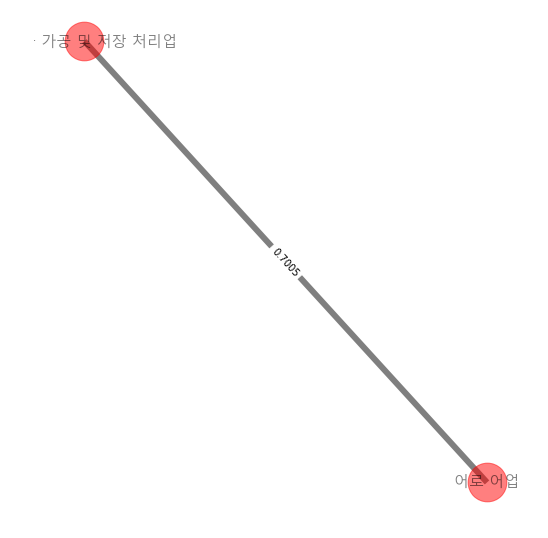

In [349]:
sec_net=nx.Graph()
# 해당 업종만 그래프그리기 :수산물 가공 및 저장 처리업
for (i,j,corr) in np.array(sector[['sector1','sector2','corr']]):
    if (i=="수산물 가공 및 저장 처리업"):
        sec_net.add_edge(i,j,weight=corr*0.01,label=round(corr,4))# 길이 어떻게 늘리는지
        # weight가 적을수록 멀어짐
    
plt.figure(figsize=(7,7))

edge_labels =dict([((u, v), d['label']) 
                   for u, v, d in sec_net.edges(data=True)])
pos = nx.spring_layout(sec_net) 
#nx.draw_networkx_edges(sec_net,pos,edgelist=edge_labels)
#nx.draw_networkx_edge_labels(sec_net, pos, edge_labels= edge_labels)
nx.draw(sec_net,pos,with_labels = True, node_size=1500,width=6,alpha=0.5,font_family=font_name,font_size=15)
nx.draw_networkx_edge_labels(sec_net,pos, edge_labels= edge_labels)

plt.show()

c:\users\ryu07\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


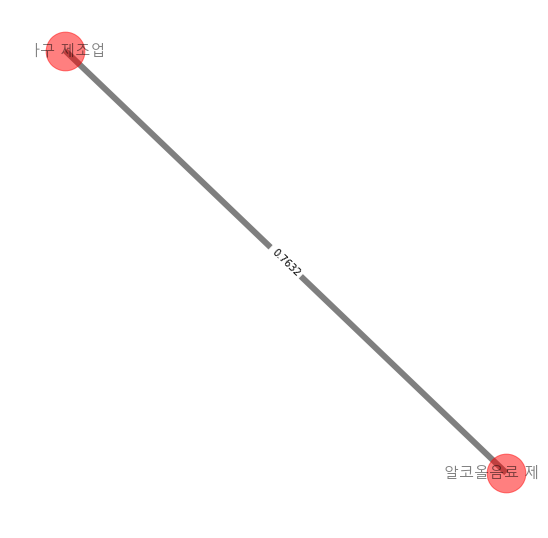

In [17]:
sec_net=nx.Graph()
# 해당 업종만 그래프그리기 :가구 제조업
for (i,j,corr) in np.array(sector[['sector1','sector2','corr']]):
    if (i=="가구 제조업"):
        sec_net.add_edge(i,j,weight=corr*0.01,label=round(corr,4))# 길이 어떻게 늘리는지
        # weight가 적을수록 멀어짐
    
plt.figure(figsize=(7,7))

edge_labels =dict([((u, v), d['label']) 
                   for u, v, d in sec_net.edges(data=True)])
pos = nx.spring_layout(sec_net) 
#nx.draw_networkx_edges(sec_net,pos,edgelist=edge_labels)
#nx.draw_networkx_edge_labels(sec_net, pos, edge_labels= edge_labels)
nx.draw(sec_net,pos,with_labels = True, node_size=1500,width=6,alpha=0.5,font_family=font_name,font_size=15)
nx.draw_networkx_edge_labels(sec_net,pos, edge_labels= edge_labels)

plt.show()

c:\users\ryu07\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


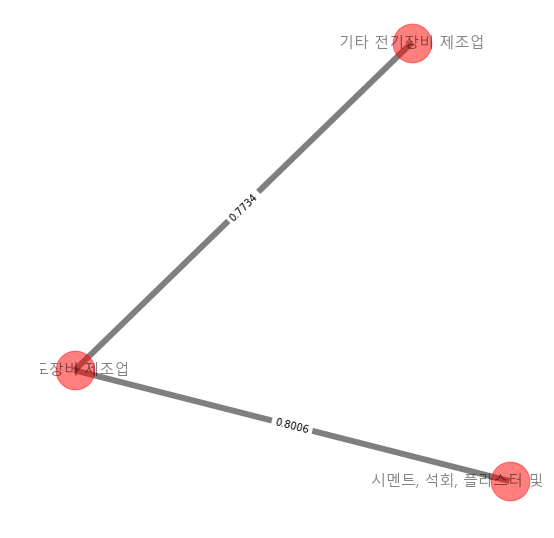

In [353]:
sec_net=nx.Graph()
# 해당 업종만 그래프그리기 :기타 화학제품 제조업
for (i,j,corr) in np.array(sector[['sector1','sector2','corr']]):
    if (i=="철도장비 제조업"):
        sec_net.add_edge(i,j,weight=corr*0.01,label=round(corr,4))# 길이 어떻게 늘리는지
        # weight가 적을수록 멀어짐
    
plt.figure(figsize=(7,7))

edge_labels =dict([((u, v), d['label']) 
                   for u, v, d in sec_net.edges(data=True)])
pos = nx.spring_layout(sec_net) 
#nx.draw_networkx_edges(sec_net,pos,edgelist=edge_labels)
#nx.draw_networkx_edge_labels(sec_net, pos, edge_labels= edge_labels)
nx.draw(sec_net,pos,with_labels = True, node_size=1500,width=6,alpha=0.5,font_family=font_name,font_size=15)
nx.draw_networkx_edge_labels(sec_net,pos, edge_labels= edge_labels)

plt.show()

In [ ]:
# 해당 업종만 그래프그리기 : 철강 제조업
for (i,j,corr) in np.array(sector[['sector1','sector2','corr']]):
    if (i=="토목 건설업") or(i=="건축기술, 엔지니어링 및 관련 기술 서비스업"):
        sec_net.add_edge(i,j,weight=corr*0.01,label=round(corr,4))# 길이 어떻게 늘리는지
        # weight가 적을수록 멀어짐
    
plt.figure(figsize=(7,7))

edge_labels =dict([((u, v), d['label']) 
                   for u, v, d in sec_net.edges(data=True)])
pos = nx.spring_layout(sec_net) 
#nx.draw_networkx_edges(sec_net,pos,edgelist=edge_labels)
#nx.draw_networkx_edge_labels(sec_net, pos, edge_labels= edge_labels)
nx.draw(sec_net,pos,with_labels = True, node_size=150,width=6,alpha=0.5,font_family=font_name,font_size=15)
nx.draw_networkx_edge_labels(sec_net,pos, edge_labels= edge_labels)

plt.show()

c:\users\ryu07\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


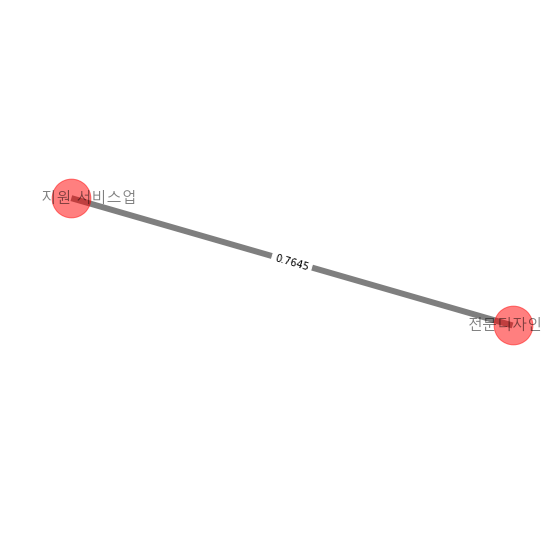

In [19]:
sec_net=nx.Graph()
# 해당 업종만 그래프그리기 :금융지원 서비스업
for (i,j,corr) in np.array(sector[['sector1','sector2','corr']]):
    if (i=="금융 지원 서비스업"):
        sec_net.add_edge(i,j,weight=corr*0.01,label=round(corr,4))# 길이 어떻게 늘리는지
        # weight가 적을수록 멀어짐
    
plt.figure(figsize=(7,7))

edge_labels =dict([((u, v), d['label']) 
                   for u, v, d in sec_net.edges(data=True)])
pos = nx.spring_layout(sec_net) 
#nx.draw_networkx_edges(sec_net,pos,edgelist=edge_labels)
#nx.draw_networkx_edge_labels(sec_net, pos, edge_labels= edge_labels)
nx.draw(sec_net,pos,with_labels = True, node_size=1500,width=6,alpha=0.5,font_family=font_name,font_size=15)
nx.draw_networkx_edge_labels(sec_net,pos, edge_labels= edge_labels)

plt.show()

c:\users\ryu07\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


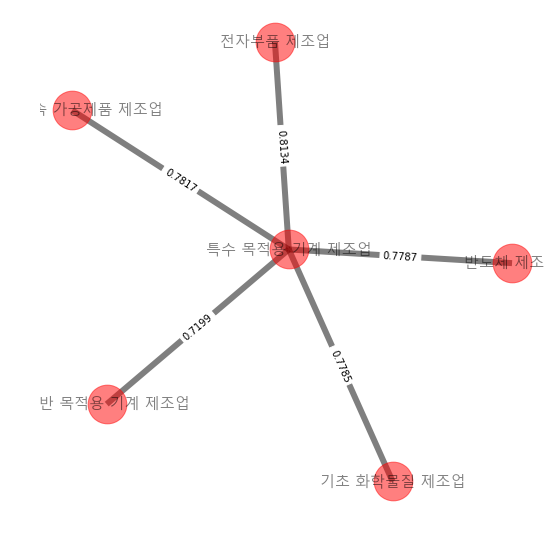

In [21]:
sec_net=nx.Graph()
# 해당 업종만 그래프그리기 :특수 목적용기계 제조업
for (i,j,corr) in np.array(sector[['sector1','sector2','corr']]):
    if (i=="특수 목적용 기계 제조업"):
        sec_net.add_edge(i,j,weight=corr*0.01,label=round(corr,4))# 길이 어떻게 늘리는지
        # weight가 적을수록 멀어짐
    
plt.figure(figsize=(7,7))

edge_labels =dict([((u, v), d['label']) 
                   for u, v, d in sec_net.edges(data=True)])
pos = nx.spring_layout(sec_net) 
#nx.draw_networkx_edges(sec_net,pos,edgelist=edge_labels)
#nx.draw_networkx_edge_labels(sec_net, pos, edge_labels= edge_labels)
nx.draw(sec_net,pos,with_labels = True, node_size=1500,width=6,alpha=0.5,font_family=font_name,font_size=15)
nx.draw_networkx_edge_labels(sec_net,pos, edge_labels= edge_labels)

plt.show()

In [225]:
# degree table 저장
degreeTable=pd.DataFrame(sorted([(n,d) for n, d in sec_net.degree()], reverse=True))
degreeTable.columns=['sector1','degree']
degreeTable.to_csv("degreeTable_outlier.csv",encoding='utf-8-sig')

c:\users\ryu07\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


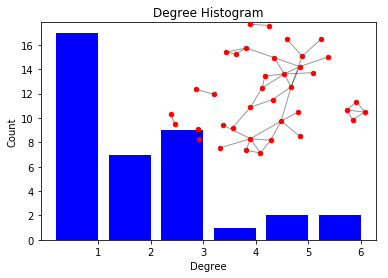

In [226]:
degree_sequence = sorted([d for n, d in sec_net.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(sec_net), key=len, reverse=True)[0]
pos = nx.spring_layout(sec_net)
plt.axis('off')
nx.draw_networkx_nodes(sec_net, pos, node_size=20)
nx.draw_networkx_edges(sec_net, pos, alpha=0.4)

plt.show()

# 업종과 상관관계가 0.7이상 존재하는 종목 나타내기

In [180]:
# data loda

sector=pd.read_csv("corrTable7_outlier.csv")
stock_sec=pd.read_csv("stock_sector_corr_outlier.csv")
sector=sector.drop(columns=['Unnamed: 0'])
stock_sec=stock_sec.drop(columns=['Unnamed: 0'])
sector.columns=['sector1','sector2','corr','p-value']

sector['corr']=sector['corr']

In [181]:
# graph 선언
sec_net=nx.Graph()


In [182]:
# 상관관계를 반영하여 edge 생성
sec_edge=np.array(sector[['sector1','sector2',"corr"]])
sec_net.add_weighted_edges_from(sec_edge)

c:\users\ryu07\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


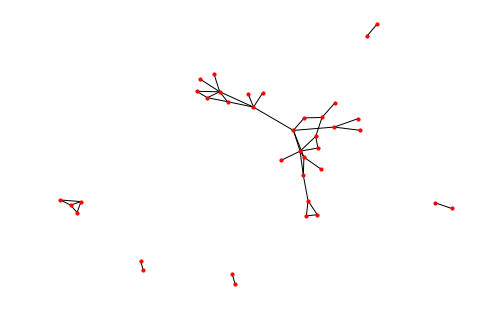

In [183]:
nx.draw(sec_net, node_size=10)

c:\users\ryu07\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


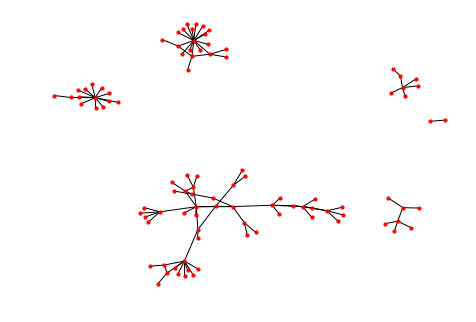

In [184]:
stock_edge=np.array(stock_sec[['sector','stock','corr']])
sec_net.add_weighted_edges_from(stock_edge)
nx.draw(sec_net, node_size=10)

In [185]:
# dictionary sector :1 ,stock :0

b={}
for i in sector['sector1'].unique():
    b[i]=1
    
sec_val=b

stock_val={}
for i in stock_sec['stock'].unique():
    stock_val[i]=0

In [186]:
sec_val.update(stock_val)

In [187]:
# 확인
sec_val

{'1차 비철금속 제조업': 1,
 '1차 철강 제조업': 1,
 '가구 제조업': 1,
 '건물 건설업': 1,
 '건축기술, 엔지니어링 및 관련 기술 서비스업': 1,
 '구조용 금속제품, 탱크 및 증기발생기 제조업': 1,
 '금속 주조업': 1,
 '금융 지원 서비스업': 1,
 '기계장비 및 관련 물품 도매업': 1,
 '기초 의약물질 및 생물학적 제제 제조업': 1,
 '기초 화학물질 제조업': 1,
 '기타 금속 가공제품 제조업': 1,
 '기타 금융업': 1,
 '기타 전기장비 제조업': 1,
 '기타 전문 도매업': 1,
 '기타 화학제품 제조업': 1,
 '반도체 제조업': 1,
 '봉제의복 제조업': 1,
 '사진장비 및 광학기기 제조업': 1,
 '생활용품 도매업': 1,
 '선박 및 보트 건조업': 1,
 '수산물 가공 및 저장 처리업': 1,
 '시멘트, 석회, 플라스터 및 그 제품 제조업': 1,
 '알코올음료 제조업': 1,
 '어로 어업': 1,
 '의료용품 및 기타 의약 관련제품 제조업': 1,
 '의약품 제조업': 1,
 '일반 목적용 기계 제조업': 1,
 '자동차 신품 부품 제조업': 1,
 '자연과학 및 공학 연구개발업': 1,
 '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업': 1,
 '전문디자인업': 1,
 '전자부품 제조업': 1,
 '철도장비 제조업': 1,
 '컴퓨터 프로그래밍, 시스템 통합 및 관리업': 1,
 '토목 건설업': 1,
 '통신 및 방송 장비 제조업': 1,
 '특수 목적용 기계 제조업': 1,
 '만호제강': 0,
 '한일철강': 0,
 '에넥스': 0,
 '화성산업': 0,
 'HDC': 0,
 '대창솔루션': 0,
 '서원': 0,
 '대동금속': 0,
 '이베스트투자증권': 0,
 'SK증권': 0,
 '유안타증권': 0,
 '한양증권': 0,
 '삼성증권': 0,
 '미래에셋대우': 0,
 'DB금융투자': 0,
 '대신증권': 0,
 '현대차투자증권': 0,
 '한화투자

In [188]:
pos = nx.spring_layout(sec_net)
values = [sec_val.get(node, 0.25) for node in sec_net.nodes()]


In [65]:
values


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [189]:
# 파란색은 stock 빨간색은 sector
blue_edges=np.array(stock_sec[['sector','stock']])
red_edges=np.array(sector[['sector1','sector2']])

In [190]:
stock_sec[['sector','stock']]

tuples=[tuple(x) for x in stock_sec[['sector','stock']].values]

blue_edges=tuples

In [191]:

tuples=[tuple(x) for x in sector[['sector1','sector2']].values]

red_edges=tuples

In [192]:
edge_colours = ['red' if not edge in blue_edges else 'blue'
                for edge in sec_net.edges()]

c:\users\ryu07\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


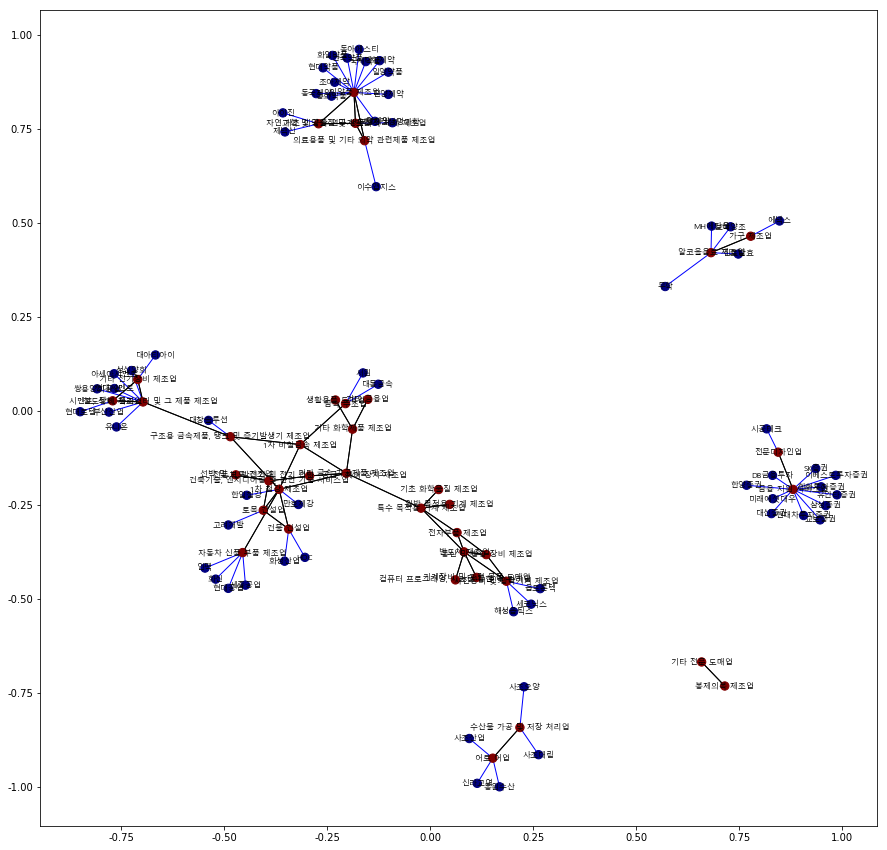

In [198]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(sec_net, pos, cmap=plt.get_cmap('jet'), 
                       node_color =values , node_size = 70)

nx.draw_networkx_labels(sec_net, pos, font_size=8, font_family=font_name)
nx.draw_networkx_edges(sec_net, pos, edgelist=blue_edges,edge_color='b')
nx.draw_networkx_edges(sec_net, pos, edgelist=red_edges)

In [75]:
len(sector['sector1'].unique())

37